In [1]:
import pathlib

import cv2
import matplotlib.pyplot as plt
import numpy as np

IMG_DIR = pathlib.Path("images/")

In [2]:
img = np.arange(256).reshape(-1, 1)
img = np.repeat(img, 256, axis=1).transpose()
img

array([[  0,   1,   2, ..., 253, 254, 255],
       [  0,   1,   2, ..., 253, 254, 255],
       [  0,   1,   2, ..., 253, 254, 255],
       ...,
       [  0,   1,   2, ..., 253, 254, 255],
       [  0,   1,   2, ..., 253, 254, 255],
       [  0,   1,   2, ..., 253, 254, 255]])

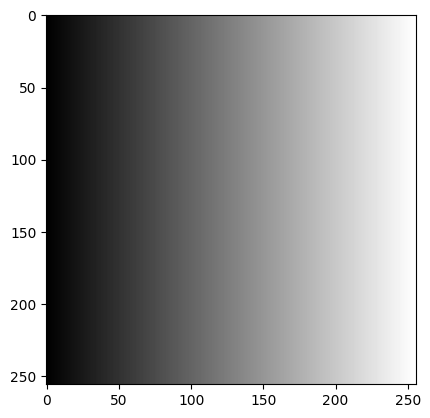

In [3]:
plt.imshow(img, cmap="grey")
plt.show()

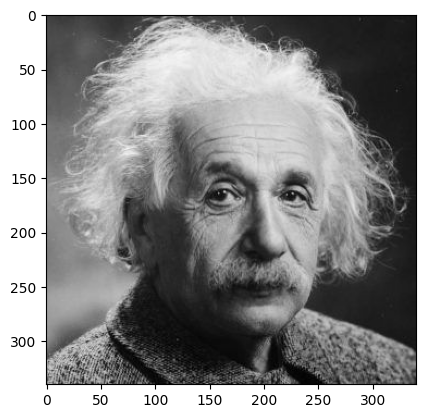

In [4]:
img = plt.imread(IMG_DIR / "Albert_Einstein.jpg")
plt.imshow(img)
plt.show()

In [5]:
img.shape

(340, 340, 3)

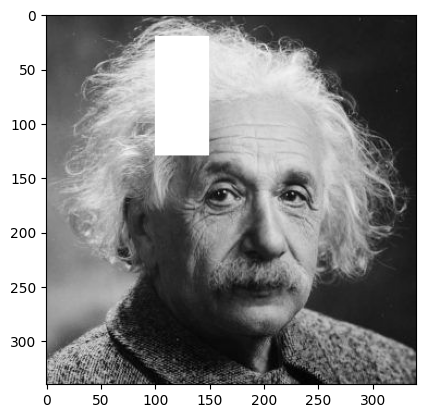

In [6]:
img2 = img.copy()
img2[20:130, 100:150] = [255, 255, 255]
plt.imshow(img2)
plt.show()

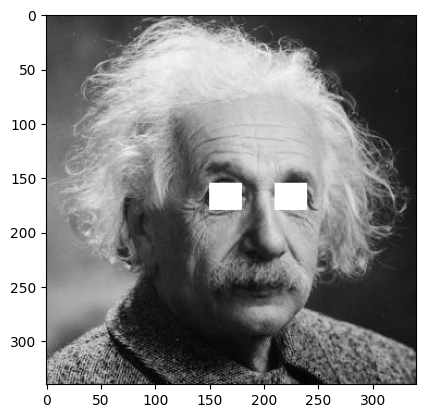

In [7]:
img3 = img.copy()
img3[155:180, 150:180] = [255, 255, 255]
img3[155:180, 210:240] = [255, 255, 255]
plt.imshow(img3)
plt.show()

In [8]:
img = cv2.imread(str(IMG_DIR / "Albert_Einstein.jpg"), flags=cv2.IMREAD_GRAYSCALE)
type(img), img.dtype, img.shape

(numpy.ndarray, dtype('uint8'), (340, 340))

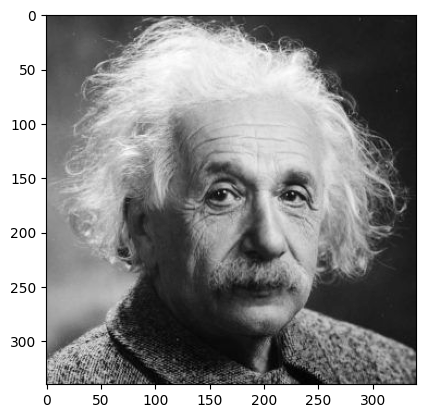

In [9]:
plt.imshow(img, cmap="grey")
plt.show()

In [15]:
def rgb_to_hsv(r, g, b, scale_factor=1):
    r, g, b = r / 255, g / 255, b / 255
    cmax = max(r, g, b)
    cmin = min(r, g, b)
    diff = cmax - cmin

    h = 0

    if cmax == r:
        h = (60 * ((g - b) / diff)) % 360
    elif cmax == g:
        h = (60 * ((b - r) / diff + 2)) % 360
    elif cmax == b:
        h = (60 * ((r - g) / diff + 4)) % 360

    h = h if h >= 0 else h + 360
    s = 0 if cmax == 0 else (diff / cmax) * scale_factor
    v = cmax * scale_factor

    return h, s, v

In [16]:
rgb_to_hsv(100, 200, 50, scale_factor=100)

(100.0, 75.0, 78.43137254901961)

In [13]:
img = cv2.imread(str(IMG_DIR / "tulips.jpg"))
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

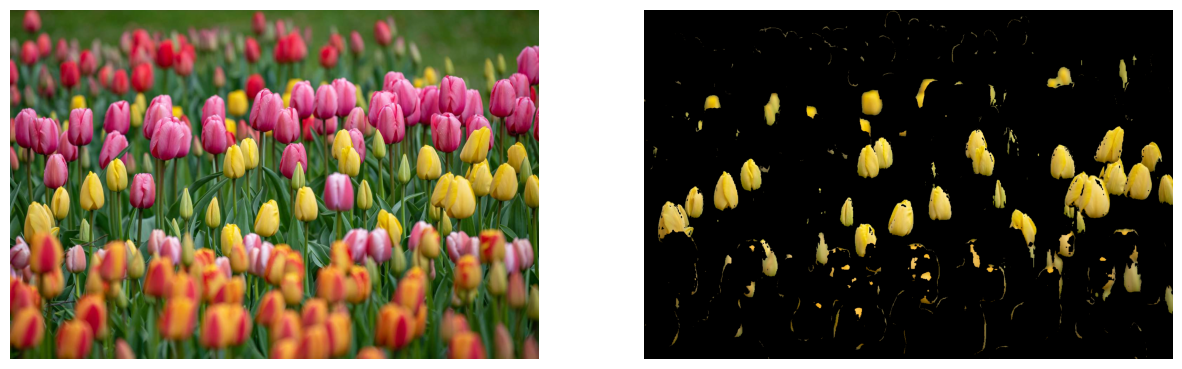

In [14]:
lr1 = np.array([20, 100, 100])
ur1 = np.array([30, 255, 255])
mask = cv2.inRange(hsv_img, lr1, ur1)

res = cv2.bitwise_and(hsv_img, hsv_img, mask=mask)  # type: ignore
res = cv2.cvtColor(res, cv2.COLOR_HSV2BGR)

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.imshow(img[:, :, ::-1])
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(res[:, :, ::-1])
plt.axis("off")
plt.show()